<h1>2013 FBI Hate Crime Data Analysis</h1>
<h3>Authors: Jingxiu Hu, Xiao Lin, Tianxin Deng</h3>

<img src="https://www.chronicle.com//img/photos/biz/photo_89873_landscape_850x566.jpg">

<div class="content-item__credit pull-right">Kenneth K. Lam, The Baltimore Sun, AP Images</div>
<br>
<div class="content-item__caption clearfix">Family members of Richard Collins III, who was slain at the U. of Maryland in May 2017, released balloons at a vigil in his memory at Bowie State U., where he was about to graduate.             </div>

<h2>Table of Contents</h2>

1. Introduction
<br>

2. Required libraries
<br>

3. The problem domain<br>
    Step 1: Questions to answer<br>
    Step 2: Data cleaning<br>
    Step 3: Exploratory analysis with visualization<br>
    Step 4: Modeling
<br>

4. Conclusions
<br>

5. References




<h2> Introduction</h2>
<br>
    On November 14, 2018, the journalist Dan Bauman published an article named “Hate Crimes on Campuses Are Rising, New FBI Data Show.” He indicates a fact that the number of hate crimes are increasing year to year. Anti-gender, anti-racial and other bias become a significant social problem. As students, we highly concern this issue, and try to find the relationship between number of crimes happened, population, and other potential factors. Due to this purpose, we find the data from FBI that collected numbers of each bias happened in each agency. <br>
The data contains Agency names of Agency type of each State that number of Race, Religion, Sexual orientation, Ethnicity, Disability, Gender, Gender identity bias reported, and sum the quantities as quarter basis. It also includes the population of the place that each agency takes charge. <br>
The input of the analysis includes population, total number of crimes in each agency, state and agency types.  To report those relationships, visualization is used to visualize the result. A model is built as a method to predict the potential crime rate. 


<h2> Required libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>The problem domain</h2>
<h3>Step1: Questions to answer</h3>

Q1: What is the relationship between population and total number of crimes in that particular area? <br>
Q2: Which state has the largest total number of crimes? <br>
Q3: Which agency type report the largest number of crimes?<br>
Q4: What is the crime rate for each agency type? <br>
Q5: What is the proportion of each agency type? <br>
Q6: Can we build a model to predict the crime rate with state name, agency type and population? 

<h3>Step2: Data Cleaning</h3>

To answer the questions above, we need a data without useless information. However, there are several problems we find in our FBI hate crime dataset: <br>
    1.	The NaN value in counties’ population column. 
    2.	The Nan values in other columns. 
    3.	Columns have different types that cannot calculate. 
    4.	There is no column that contains total number of crimes added by each bias.
All the above problems are solved, and a clean data is showed in the final data frame crimeDF. The cleaning details are showed below. 

In [2]:
crimeDF = pd.read_csv("FBI_2013_Hate_Crime_Data.csv")

In [3]:
crimeDF.sample(n=5, random_state=1)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
258,California,Metropolitan Counties,Santa Cruz,1,0,1,1,0,0,0.0,2.0,0.0,1.0,0.0,NaN
984,New_Jersey,Cities,Brick Township,2,1,0,1,0,0,0.0,1.0,2.0,1.0,0.0,"75,371"
922,Missouri,Cities,Raytown,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,"29,501"
351,Connecticut,Cities,Plainville,0,0,1,0,0,0,0.0,NaN,NaN,NaN,1.0,"17,850"
231,California,Universities and Colleges,California State Polytechnic University: San L...,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,"18,679"


We can see Metropolitan Counties and Nonmetropolitan Counties has NaN in their Population column.

In [4]:
crimeDF.loc[crimeDF['Agency type']==('Metropolitan Counties')].sample(n=5, random_state=1)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
616,Louisiana,Metropolitan Counties,Calcasieu,0,4,3,0,0,0,0.0,4.0,1.0,1.0,1.0,NaN
315,Colorado,Metropolitan Counties,Pueblo,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,NaN
316,Colorado,Metropolitan Counties,Weld,1,0,1,0,0,0,0.0,1.0,0.0,1.0,0.0,NaN
503,Iowa,Metropolitan Counties,Mills,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
860,Michigan,Metropolitan Counties,Oakland,7,2,5,3,0,0,0.0,5.0,4.0,5.0,3.0,NaN


In [5]:
crimeDF.loc[crimeDF['Agency type']==('Nonmetropolitan Counties')].sample(n=5, random_state=1).sample(n=5, random_state=1)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
534,Kansas,Nonmetropolitan Counties,Greenwood,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
1636,Utah,Nonmetropolitan Counties,Carbon,3,0,0,0,0,0,0.0,1.0,0.0,2.0,0.0,NaN
913,Minnesota,Nonmetropolitan Counties,Rice,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
1802,West_Virginia,Nonmetropolitan Counties,Harrison,1,1,2,0,0,0,0.0,0.0,0.0,2.0,2.0,NaN
1824,Wisconsin,Nonmetropolitan Counties,Oneida,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN


We will fill the NaN value in the crimeDF with information we got from another file contains population for counties.

In [6]:
countyDF = pd.read_csv("county_population.csv")

we can see the 'link' column is not cleaned, we only want to keep the county name.

In [7]:
countyDF.sample(n=5, random_state=1)

,link,State,pop2016,pop2010,GrowthRate
80,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Massachusetts,785205,745422,0.053370
84,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Georgia,755754,689595,0.095939
33,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Ohio,1248514,1278200,-0.023225
81,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",California,771410,719899,0.071553
93,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Missouri,698895,674804,0.035701


Clean the link column and store the result in a listed called link_clean.

In [8]:
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [9]:
clean_link= []
for element in countyDF['link']:
    element = element.split(",")[4].split(':')[1]
    element = ''.join(filter(whitelist.__contains__, element))
    clean_link.append(element)

In [10]:
countyDF['clean_link'] = clean_link

In [11]:
countyDF.sample(n=5, random_state=1)

,link,State,pop2016,pop2010,GrowthRate,clean_link
80,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Massachusetts,785205,745422,0.053370,Essex County
84,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Georgia,755754,689595,0.095939,Cobb County
33,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Ohio,1248514,1278200,-0.023225,Cuyahoga County
81,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",California,771410,719899,0.071553,San Mateo County
93,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Missouri,698895,674804,0.035701,Jackson County


Because our crime records is in 2013, so we will generate the population of each county in 2013 with their population in 2010 and the growth rate of their population.

In [12]:
pop2013 = []
for index, row in countyDF.iterrows():
    result = row['pop2010']*(1 + float(row['GrowthRate']))**3
    pop2013.append(int(result))

In [13]:
countyDF['pop2013'] = pop2013

In [14]:
countyDF.sample(n=5, random_state=1)

,link,State,pop2016,pop2010,GrowthRate,clean_link,pop2013
80,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Massachusetts,785205,745422,0.053370,Essex County,871253
84,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Georgia,755754,689595,0.095939,Cobb County,907722
33,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Ohio,1248514,1278200,-0.023225,Cuyahoga County,1191194
81,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",California,771410,719899,0.071553,San Mateo County,885753
93,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Missouri,698895,674804,0.035701,Jackson County,749687


We only need to keep the columns clean_link and pop2013.

In [15]:
countyDF = countyDF[['clean_link','pop2013']]

In [16]:
countyDF.sample(n=5, random_state=1)

,clean_link,pop2013
80,Essex County,871253
84,Cobb County,907722
33,Cuyahoga County,1191194
81,San Mateo County,885753
93,Jackson County,749687


Fill the NaN in population column in crimeDf with countyDF.

In [17]:
d = {}
for index, row in countyDF.iterrows():
    d[row['clean_link'].rsplit(' ', 1)[0]] = row['pop2013']

In [18]:
for index, row in crimeDF.iterrows():
    if type(row['Population']) is str:
        crimeDF.at[index, 'Population'] = row['Population'].replace(',', '')
    if row['Agency name'] in d and type(row['Population']) is float:
        crimeDF.at[index, 'Population'] = d[row['Agency name']]

There are still some nan values in the poplation column for thoes counties that are not in our county file. For this project we will only keep the rows that doesn't have NaN in the population column.

In [19]:
for element in crimeDF:
    if type(element) is str:
        element= element.replace(',', '')
crimeDF['Population'] = crimeDF['Population'].astype(float)
crimeDF = crimeDF[np.isfinite(crimeDF['Population'])]

In [20]:
crimeDF['Population'].isna().sum()

0

There are also NaN values in other columns in the crimeDF. But from observe the dataframe, we find out these NaN values is just when the number of crime is 0(I guess sometimes they decide to leave the cell empty if no crime is reported). So we can just fill these NaNs with 0.

In [21]:
crimeDF.isna().sum()

State                  0
Agency type            0
Agency name            0
Race                   0
Religion               0
Sexual orientation     0
Ethnicity              0
Disability             0
Gender                 1
Gender Identity        1
1st quarter           25
2nd quarter           28
3rd quarter           17
4th quarter           36
Population             0
dtype: int64

In [22]:
crimeDF = crimeDF.fillna(0)

In [23]:
crimeDF.isna().sum()

State                 0
Agency type           0
Agency name           0
Race                  0
Religion              0
Sexual orientation    0
Ethnicity             0
Disability            0
Gender                0
Gender Identity       0
1st quarter           0
2nd quarter           0
3rd quarter           0
4th quarter           0
Population            0
dtype: int64

Visuallization

In [24]:
crimeDF.head(10)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,39481.0
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,84139.0
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,35154.0
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,94126.0
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,299455.0
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,36626.0
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0.0,1.0,1.0,3.0,0.0,78905.0
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,5034.0
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,32837.0
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,225232.0


Check the types of each column, convert Race, Religion, Sexual, Ethnicity, Disability, Gender and Gender Identity to int.

In [25]:
crimeDF.dtypes

State                  object
Agency type            object
Agency name            object
Race                    int64
Religion                int64
Sexual orientation      int64
Ethnicity               int64
Disability              int64
Gender                 object
Gender Identity       float64
1st quarter           float64
2nd quarter           float64
3rd quarter           float64
4th quarter           float64
Population            float64
dtype: object

In [26]:
crimeDF=crimeDF.replace(r'^\s*$', np.nan, regex=True)
crimeDF.isna().sum()

State                 0
Agency type           0
Agency name           0
Race                  0
Religion              0
Sexual orientation    0
Ethnicity             0
Disability            0
Gender                1
Gender Identity       0
1st quarter           0
2nd quarter           0
3rd quarter           0
4th quarter           0
Population            0
dtype: int64

In [27]:
crimeDF['Gender Identity']=crimeDF['Gender Identity'].astype(int)
crimeDF['Gender']=crimeDF['Gender'].fillna(0)
crimeDF['Gender']=crimeDF['Gender'].astype(int)


Add a new column named Total that sum all crimes in each row.

In [28]:
crimeDF['Total']=None
for i in range(len(crimeDF)):
    crimeDF['Total'].iloc[i]=crimeDF['Race'].iloc[i] + crimeDF['Gender'].iloc[i] + crimeDF['Religion'].iloc[i] + crimeDF['Sexual orientation'].iloc[i] + crimeDF['Ethnicity'].iloc[i] + crimeDF['Disability'].iloc[i] + crimeDF['Gender Identity'].iloc[i]
    

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
crimeDF

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0.0,1.0,0.0,1.0,39481.0,2
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,84139.0,1
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1.0,0.0,1.0,0.0,35154.0,2
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,94126.0,1
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2.0,3.0,3.0,0.0,299455.0,8
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,36626.0,1
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1.0,1.0,3.0,0.0,78905.0,5
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0,5034.0,1
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,32837.0,1
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,225232.0,1


<h3>Step 3: Exploratory analysis with visualization</h3>

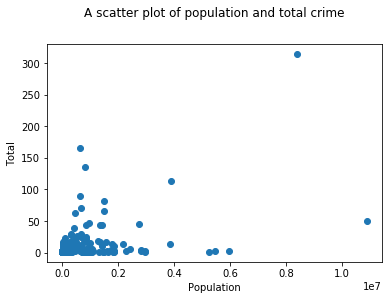

In [30]:
plt.scatter(crimeDF.Population, crimeDF.Total)
plt.xlabel("Population")
plt.ylabel("Total")
plt.title("A scatter plot of population and total crime", y=1.1)
plt.show()

This plot is used to find the relationship between populatin and total number of crimes reported in agencies. The x axis indicates population, and the y axis represents the total number of hate crimes reported to the agency. Based on the plot, the points seem not have a pattern to display. As the population increases, the total number of crimes are not affected. Thus, there is no positive or negative relation between the population and total number of crimes reported. There is a point that might be considered as a outlier since it has very high crimes number and high population, but we still keep them. Since the data is from FBI and collected in 2013, we could not find evidence to prove it is not a possible existence. 

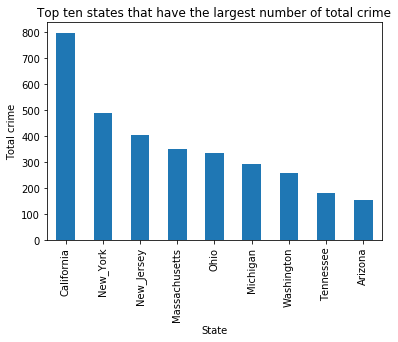

In [31]:
statesum=crimeDF.groupby('State').sum()
statesum.sort_values("Total", inplace=True, ascending=False)
topten=statesum.iloc[0:9]
topten['Total'].plot.bar()
plt.ylabel("Total crime")
plt.title("Top ten states that have the largest number of total crime")
plt.show()

In [32]:
statesum

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total
State,,,,,,,,,,,,,
California,348,128,204,111,1,0,7,200.0,211.0,208.0,180.0,56172151.0,799
New_York,114,219,113,31,2,5,4,88.0,137.0,124.0,141.0,13782326.0,488
New_Jersey,180,121,61,38,4,0,0,73.0,127.0,98.0,106.0,3990457.0,404
Massachusetts,146,64,91,42,3,1,3,74.0,97.0,96.0,83.0,3454660.0,350
Ohio,207,13,54,38,21,0,0,53.0,80.0,112.0,88.0,11942248.0,333
Michigan,187,38,43,17,4,3,0,62.0,79.0,85.0,66.0,8050294.0,292
Washington,142,37,42,25,5,4,1,55.0,69.0,69.0,63.0,11567389.0,256
Tennessee,54,6,37,74,9,0,1,23.0,35.0,60.0,64.0,6028219.0,181
Arizona,72,29,27,23,1,0,0,48.0,36.0,50.0,18.0,10381848.0,152


There are 50 state included in the data. A bar chart to plot all of them makes the state name really hard to see. For the question 2, we want to find the state with highest total number of crimes, so we create a new data frmae "statesum" that sum all total number of crimes that happened inside each state and sort by total. By using the "statesum" date frame, we plot the top ten state. As the bar plot above, California has the highest total number of crimes reported. 

To know among city, metrolopitan counties, nonmetropolitan counties, universities and colleges, which has the highest Crime Number, with highest percentage, below are the related three plots.

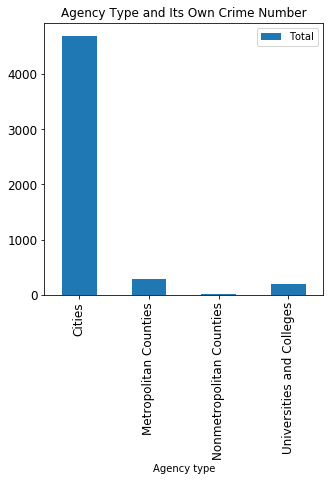

In [33]:
citys = crimeDF.groupby('Agency type').sum()
citys[['Total']].plot(kind='bar', title ="Agency Type and Its Own Crime Number", figsize=(5, 5), legend=True, fontsize=12)

The plot shows that cities looks like have the most amount of crime records number. And nonmetropolitan counties looks like have the least amount of crime records number. First, the citys dataframe was made by groupby the agency type column, so we have the collection data of four agency type. The barplot helps to understand how cities, metropolitan counties, nonmetropolitan counties and universities and colleges can be influenced by the total criminal records amount.

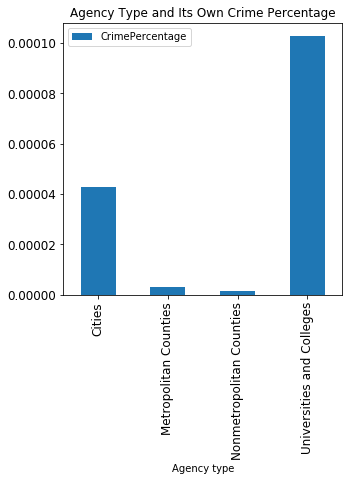

In [34]:
citys['CrimePercentage'] = citys['Total'] / citys['Population']
citys[['CrimePercentage']].plot(kind='bar', title ="Agency Type and Its Own Crime Percentage", figsize=(5, 5), legend=True, fontsize=12)

The plot shows the relation between the cities, metropolitan counties, nonmetropolitan counties and universities and colleges with their own criminal percentage. Compare to the previous plot with this plot, it is interesting to figure out that though cities have the most amount of criminal records, they are not the area which have the most criminal percentage, which means, cities have large amount of criminal records, but there are still many other factors that may influence the criminal percentage. So it is not perfect to say that universities and colleges are the most dangerous area.

In [35]:
citys

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total,CrimePercentage
Agency type,,,,,,,,,,,,,,
Cities,2280,783,1022,501,65,14,28,1006.0,1330.0,1329.0,1031.0,109132738.0,4693,0.000043
Metropolitan Counties,111,48,53,74,1,0,1,57.0,74.0,78.0,79.0,89047359.0,288,0.000003
Nonmetropolitan Counties,7,1,2,2,1,0,0,5.0,0.0,4.0,4.0,8486138.0,13,0.000002
Universities and Colleges,90,37,53,10,1,3,1,50.0,39.0,43.0,64.0,1897158.0,195,0.000103


The citys dataframe collects total criminal records amounts, crime percentage amount of all four recorded areas.

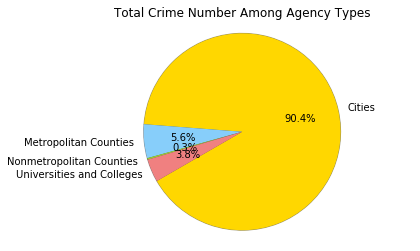

In [36]:
labels = 'Cities', 'Metropolitan Counties', 'Nonmetropolitan Counties', 'Universities and Colleges'
sizes = [4693, 288, 13, 195]
colors = ['gold', 'lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 210, radius = 3600)
plt.axis('equal')
plt.title('Total Crime Number Among Agency Types')
plt.show()

From the pie chart, it is more clearly to say that cities have the most amount of criminal records than others, however, as previous analysis says, it is not fitable to say that this would means cities are the most dangerous areas.

<h2>Step 4: Modeling</h2>

In terms of modeling fitting, we want to build a model that will predict an area has a high crime rate or not. And logstic regression is perfect for the task.

First we create a new column in the dataframe to record the total number of hate crimes in the area.

In [37]:
total_crime = []

In [38]:
for index, row in crimeDF.iterrows():
    total = int(row[10]) + int(row[11]) + int(row[12]) + int(row[13])
    total_crime.append(total)

In [39]:
crimeDF['total_crime'] = total_crime

Create a new column called population_in_thounds to convert population to population with unit of 1000 people.

In [40]:
population_in_thounsands = []
for element in crimeDF['Population']:
    population_in_thounsands.append(element / 1000)

In [41]:
crimeDF['Population_in_thounsands'] = population_in_thounsands

In [42]:
crimeDF.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total,total_crime,Population_in_thounsands
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0.0,1.0,0.0,1.0,39481.0,2,2,39.481
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,84139.0,1,1,84.139
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1.0,0.0,1.0,0.0,35154.0,2,2,35.154
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,94126.0,1,1,94.126
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2.0,3.0,3.0,0.0,299455.0,8,8,299.455


Create a new column to calculate the hate crime rate of each area. Crime rate is calculated by: (number of crimes / population) * 100000. It means the number of crimes likely will happen in every hundred thousand people.

In [43]:
crime_rate = []

In [44]:
for index, row in crimeDF.iterrows():
    cr = (row['total_crime'] / row['Population']) * 100000
    crime_rate.append(cr)
crimeDF['hate_crime_rate'] = crime_rate

In [45]:
crimeDF.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total,total_crime,Population_in_thounsands,hate_crime_rate
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0.0,1.0,0.0,1.0,39481.0,2,2,39.481,5.065728
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,84139.0,1,1,84.139,1.188509
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1.0,0.0,1.0,0.0,35154.0,2,2,35.154,5.689253
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,94126.0,1,1,94.126,1.062406
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2.0,3.0,3.0,0.0,299455.0,8,8,299.455,2.671520


In [46]:
crimeDF.drop(crimeDF.columns[[3,4,5,6,7,8,9,10,11,12,13]], axis = 1, inplace = True)

In [47]:
crimeDF['hate_crime_rate'].median()

6.285750229122293

The median of hate crime rate is around 6.3. Create a new column to indicate each area has high hate crime rate(above median) or low hate crime rate(below median).

In [48]:
high_hate_crime_rate = []
for element in crimeDF['hate_crime_rate']:
    if element > 6.3:
        high_hate_crime_rate.append(1)
    else:
        high_hate_crime_rate.append(0)
crimeDF['high_hate_crime_rate'] = high_hate_crime_rate

Rearrange columns of crimeDF so the Y variable is at the begining of the dataframe.

In [49]:
crimeDF = crimeDF[['high_hate_crime_rate', 'State', 'Agency type', 'Agency name', 'Population', 'total_crime', 'Population_in_thounsands', 'hate_crime_rate']]

State and Agency type column are all string values. Therefore we need to create dummy variables for them.

In [50]:
agency_type_dummy = pd.get_dummies(crimeDF['Agency type'])

In [51]:
state_dummy = pd.get_dummies(crimeDF['State'])

In [52]:
crimeDF = pd.concat([crimeDF, agency_type_dummy, state_dummy], axis=1,sort = True)

In [53]:
crimeDF.drop(['State', 'Agency type', 'Agency name'],axis = 1, inplace = True)

In [54]:
crimeDF.drop(['Population', 'total_crime', 'hate_crime_rate'],axis = 1, inplace = True)

In [55]:
crimeDF.head()

,high_hate_crime_rate,Population_in_thounsands,Cities,Metropolitan Counties,Nonmetropolitan Counties,Universities and Colleges,Alabama,Alaska,Arizona,Arkansas,...,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West_Virginia,Wisconsin,Wyoming
0,0,39.481,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,84.139,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.154,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,94.126,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,299.455,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = crimeDF.drop('high_hate_crime_rate', axis = 1)
y = crimeDF['high_hate_crime_rate']

Spilt the data in to tran and test. We use the function from sklearn with test size equal to 33% of the data size.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

Use the train data set to train the logistic regression model. We use the population, agency type(Cities, Metropolitan Counties, Nonmetropolitan Counties or Universities and Colleges) and state to predict if the area has a high hate crime rate or not.

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lm = LogisticRegression()

In [61]:
lm.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

After ploting the top 10 important features of our model, we can see all of the top tem important features are states. Therefore, state definatly plays an important role in determine if the hate crime rate.

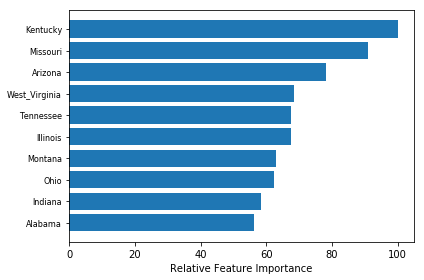

In [62]:
feature_importance = abs(lm.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[45:]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Use the logistic regression model we trained to predict our test data set.

In [63]:
predictions = lm.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

We see our model is 79% acurate when predicting a area with low crime rate and 70% acurate when predicting area with high crime rate.

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       249
           1       0.70      0.81      0.76       243

   micro avg       0.74      0.74      0.74       492
   macro avg       0.75      0.74      0.74       492
weighted avg       0.75      0.74      0.74       492



In [66]:
from sklearn.metrics import confusion_matrix

Here is the confusion matrix of our predictions. It looks pretty good. Because the number of actual true and actual false is a lot more than number of fasle positive and false negative.

In [67]:
confusion_matrix(y_test, predictions)

array([[166,  83],
       [ 45, 198]])

In [68]:
from sklearn.metrics import accuracy_score

Let's check out the accuarcy score of model. It is 73.98% which I think is not too bad.

In [69]:
accuracy_score(y_test, predictions)

0.7398373983739838

<h2>Conclusion</h2>

- The null hypothesis that cities, metropolitan counties, nonmetropolitan counties and universities and colleges have same crime percentage can be rejected.


- Though cities have the most number of crime records, they do not have the most crime percentage. Though universities and colleges may not have the highest number of crime records, they have the most crime percentage, which indicate that recent years more and more school shooting, school threatening warnings are happened.


- To answer the questions:
    - Q1: What is the relationship between population and total number of crimes in that particular area? 
        - As the population increases, the total number of crimes are not affected. Thus, there is no positive or negative relation between the population and total number of crimes reported. 
    - Q2: Which state has the largest total number of crimes? 
        - California.
    - Q3: Which agency type report the largest number of crimes?
        - Cities
    - Q4: What is the crime rate for each agency type? 
        - Cities: 0.0043%
        - Metropolitan Counties: 0.0003%
        - Nonmetropolitan Counties: 0.0002%
        - Universities and Colleges: 0.0103%
    - Q5: What is the proportion of each agency type? 
        - Cities: 90.4%
        - Metropolitan Counties: 5.6%
        - Nonmetropolitan Counties: 0.3%
        - Universities and Colleges: 3.8%
    - Q6: Can we build a model to predict the crime rate with state name, agency type and population?
        - Yes. And we also calculate the accuracy_score.

<h2>References</h2>
<br>
1.Hate crime on campus rising, new FBI data show, Dan Bauman, https://www.chronicle.com/article/Hate-Crimes-on-Campuses-Are/245093  <br>
2.An example machine learning notebook, Randal S. Olson, https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb
